In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [ ]:
df1 = pd.read_csv("/content/sample_data/crop_production.csv")
df1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
df1.State_Name.value_counts()

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

In [ ]:
df1.Crop_Year.value_counts().sort_index()

1997     8899
1998    11533
1999    12515
2000    13658
2001    13361
2002    16671
2003    17287
2004    14117
2005    13799
2006    14328
2007    14526
2008    14550
2009    14116
2010    14065
2011    14071
2012    13410
2013    13650
2014    10973
2015      562
Name: Crop_Year, dtype: int64

In [ ]:
df1.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

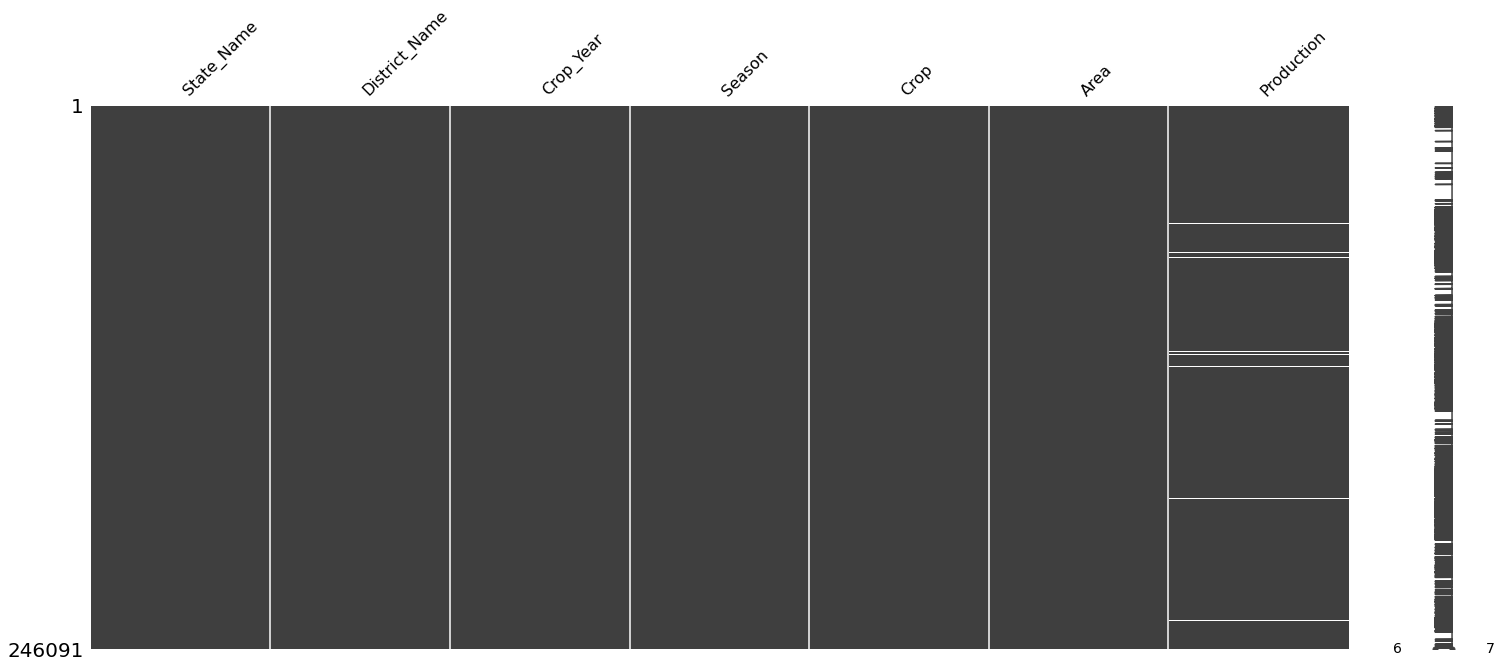

In [ ]:
msno.matrix(df1)
plt.show()


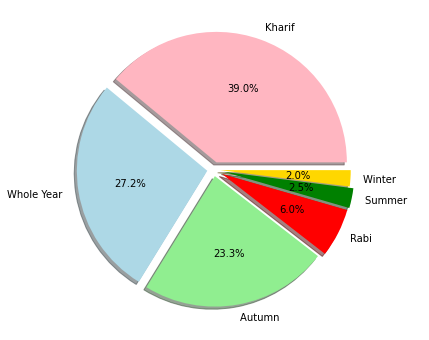

In [ ]:
plt.figure(figsize = (6,6))
segment = df1['Season'].value_counts()
segment_label = df1['Season'].unique()
color = ('LightPink', "LightBlue" , 'LightGreen','red','green','Gold')

plt.pie(segment,
       autopct = '%1.1f%%',
       labels = segment_label,
       explode = (0.06,0.05,0.05,0.07,0.08,0.05),
       shadow = True,
       colors = color);

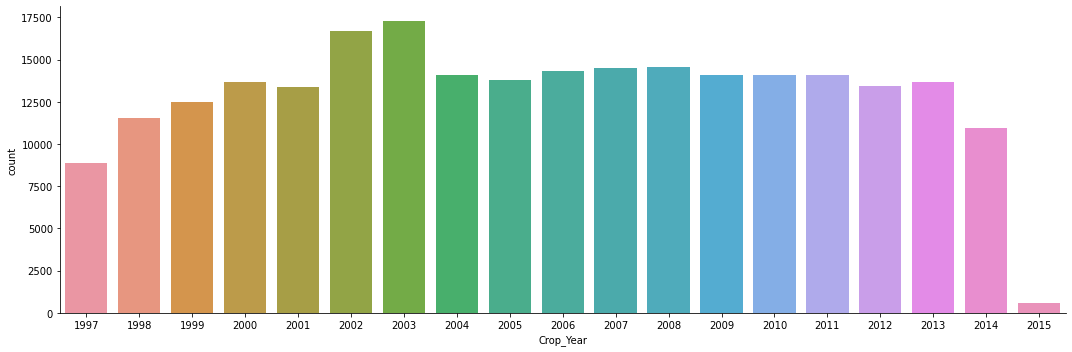

In [ ]:
sns.catplot(data=df1,x="Crop_Year",aspect=3,kind='count')

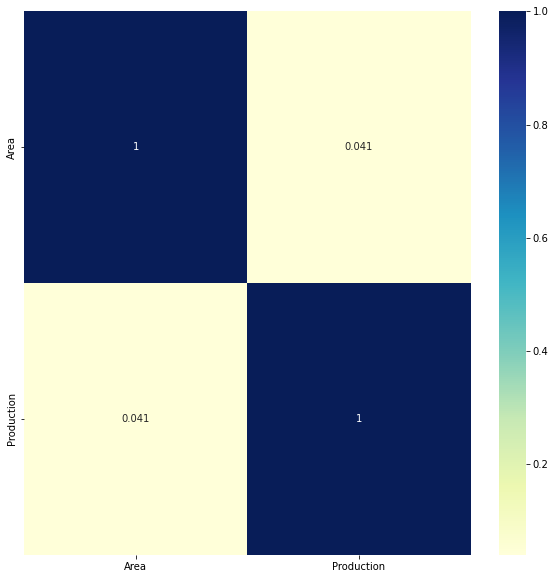

In [ ]:
corr=df1[['Area','Production']].corr()
sns.heatmap(corr,annot = True , cmap = 'YlGnBu')

In [ ]:
import pickle
def save(dictionary, name):
    with open(name, 'wb') as fp:
        pickle.dump(dictionary, fp, protocol=pickle.HIGHEST_PROTOCOL)

# func to load:
def load(name):
    with open(name, 'rb') as fp:
        data = pickle.load(fp)
        return data

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [ ]:
df = pd.read_csv("/content/sample_data/data.csv")

In [ ]:
df.head(30)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.shape

(2200, 8)

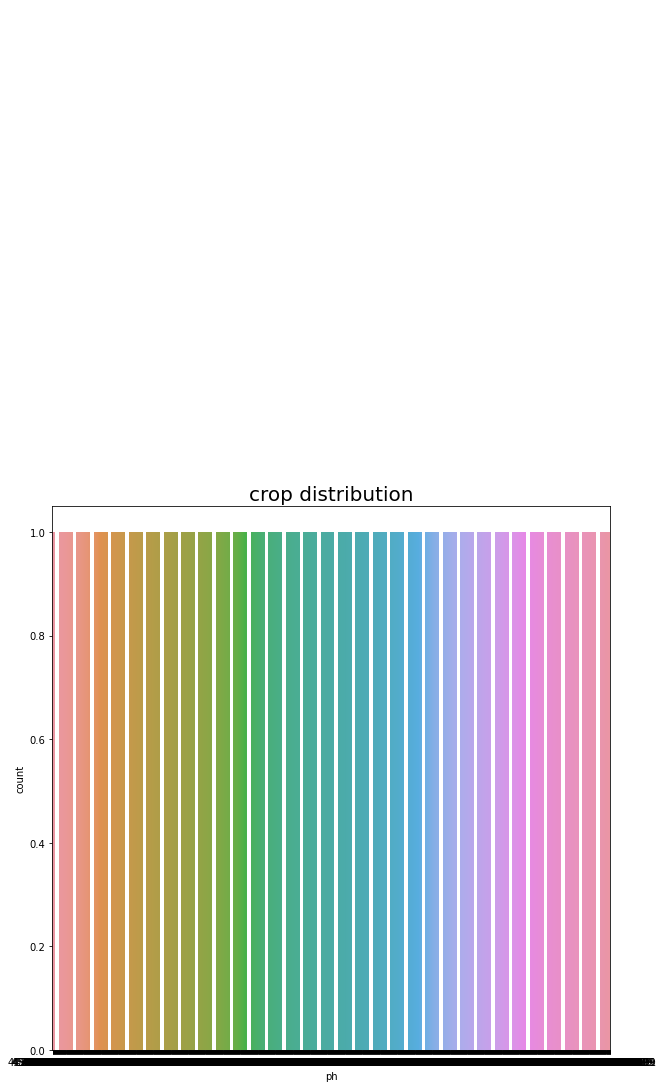

In [ ]:
ax = sns.countplot(data = df, x ='ph')
ax.set_title('crop distribution', fontsize=20)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
print("Average ratio of Nitrogen in soil : {0:2f}".format(df['N'].mean()))
print("Average ratio of phasphorous in soil : {0:2f}".format(df['P'].mean()))
print("Average ratio of potasium in soil : {0:2f}".format(df['K'].mean()))
print("Average ratio of temperature in soil : {0:2f}".format(df['temperature'].mean()))
print("Average ratio of humidity in soil : {0:2f}".format(df['humidity'].mean()))
print("Average ratio of ph in soil : {0:2f}".format(df['ph'].mean()))
print("Average ratio of rainfall in soil : {0:2f}".format(df['rainfall'].mean()))

Average ratio of Nitrogen in soil : 50.551818
Average ratio of phasphorous in soil : 53.362727
Average ratio of potasium in soil : 48.149091
Average ratio of temperature in soil : 25.616244
Average ratio of humidity in soil : 71.481779
Average ratio of ph in soil : 6.469480
Average ratio of rainfall in soil : 103.463655


In [ ]:
@interact 
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label']==crops]
    print('-----------------------------------------------')
    print('Statistic for Nitrogen')
    print('Minimum Nitrogen required :',x['N'].min())
    print('Average Nitrogen required :',x['N'].mean())
    print('Maximum Nitrogen required :',x['N'].max())
    print("------------------------------------------------")
    print('Statistic for Nitrogen')
    print('Minimum phosphorous required :',x['P'].min())
    print('Average phosphorous required :',x['P'].mean())
    print('Maximum phosphorous required :',x['P'].max())
    print("------------------------------------------------")
    print('Statistic for Nitrogen')
    print('Minimum potassium required :',x['K'].min())
    print('Average potassium required :',x['K'].mean())
    print('Maximum potassium required :',x['K'].max())
    print("------------------------------------------------")
    print("Statistic for temperature")
    print("Minimum Temperature required : {0:2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:2f}".format(x['temperature'].max()))
    print("------------------------------------------------")
    print("Statistic for temperature")
    print("Minimum humidity required : {0:2f}".format(x['humidity'].min()))
    print("Average humidity required : {0:2f}".format(x['humidity'].mean()))
    print("Maximum humidity required : {0:2f}".format(x['humidity'].max()))
    print("------------------------------------------------")
    print("Statistic for temperature")
    print("Minimum rainfall required : {0:2f}".format(x['rainfall'].min()))
    print("Average rainfall required : {0:2f}".format(x['rainfall'].mean()))
    print("Maximum rainfall required : {0:2f}".format(x['rainfall'].max()))
    print("Statistic for ph")
    print("Minimum ph required : {0:2f}".format(x['ph'].min()))
    print("Average ph required : {0:2f}".format(x['ph'].mean()))
    print("Maximum ph required : {0:2f}".format(x['ph'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
crops = list(df['label'].value_counts().index)
crops

['rice',
 'maize',
 'jute',
 'cotton',
 'coconut',
 'papaya',
 'orange',
 'apple',
 'muskmelon',
 'watermelon',
 'grapes',
 'mango',
 'banana',
 'pomegranate',
 'lentil',
 'blackgram',
 'mungbean',
 'mothbeans',
 'pigeonpeas',
 'kidneybeans',
 'chickpea',
 'coffee']

selection of crop based on interest

In [ ]:
y = df[df['label']=='rice']
y

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [ ]:
(y['N']).min()



60

In [ ]:
(y['N']).mean()

79.89

In [ ]:
(y['N']).max()

99

In [ ]:
list(df['label'].value_counts().index)

['rice',
 'maize',
 'jute',
 'cotton',
 'coconut',
 'papaya',
 'orange',
 'apple',
 'muskmelon',
 'watermelon',
 'grapes',
 'mango',
 'banana',
 'pomegranate',
 'lentil',
 'blackgram',
 'mungbean',
 'mothbeans',
 'pigeonpeas',
 'kidneybeans',
 'chickpea',
 'coffee']

In [ ]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print('Average value for',conditions,'is {0:.2f}'.format(df[conditions].mean()))
    print("------------------------------------------------------------------------")
    print('Rice : {0:2f}'.format(df[(df['label']=='rice')][conditions].mean()))
    print('lentil : {0:2f}'.format(df[(df['label']=='lentil')][conditions].mean()))
    print('cotton : {0:2f}'.format(df[(df['label']=='cotton')][conditions].mean()))
    print('mungbean : {0:2f}'.format(df[(df['label']=='mungbean')][conditions].mean()))
    print('jute : {0:2f}'.format(df[(df['label']=='jute')][conditions].mean()))
    print('muskmelon : {0:2f}'.format(df[(df['label']=='muskmelon')][conditions].mean()))
    print('blackgram : {0:2f}'.format(df[(df['label']=='blackgram')][conditions].mean()))
    print('papaya : {0:2f}'.format(df[(df['label']=='papaya')][conditions].mean()))
    print('orange : {0:2f}'.format(df[(df['label']=='orange')][conditions].mean()))
    print('apple : {0:2f}'.format(df[(df['label']=='apple')][conditions].mean()))
    print('pigeonpeas : {0:2f}'.format(df[(df['label']=='pigeonpeas')][conditions].mean()))
    print('coffee : {0:2f}'.format(df[(df['label']=='coffee')][conditions].mean())) 
    print('maize : {0:2f}'.format(df[(df['label']=='maize')][conditions].mean()))
    print('chickpea : {0:2f}'.format(df[(df['label']=='chickpea')][conditions].mean()))
    print('pomegranate : {0:2f}'.format(df[(df['label']=='pomegranate')][conditions].mean()))
    print('kidneybeans : {0:2f}'.format(df[(df['label']=='kidneybeans')][conditions].mean()))
    print('mango : {0:2f}'.format(df[(df['label']=='mango')][conditions].mean()))
    print('banana : {0:2f}'.format(df[(df['label']=='banana')][conditions].mean()))
    print('grapes : {0:2f}'.format(df[(df['label']=='grapes')][conditions].mean()))
    print('mothbeans : {0:2f}'.format(df[(df['label']=='mothbeans')][conditions].mean()))
    print('watermelon : {0:2f}'.format(df[(df['label']=='watermelon')][conditions].mean()))
    print('coconut : {0:2f}'.format(df[df['label']=='coconut'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [ ]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("crops which required grater than average",conditions,'\n')
    print(df[df[conditions]> df[conditions].mean()]['label'].unique())
    print("-----------------------------------------------------------")
    print("crops which required less than average",conditions,'\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
conditions = ['N','P','K','temperature','ph','humidity','rainfall']
df[conditions].mean()

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
ph               6.469480
humidity        71.481779
rainfall       103.463655
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

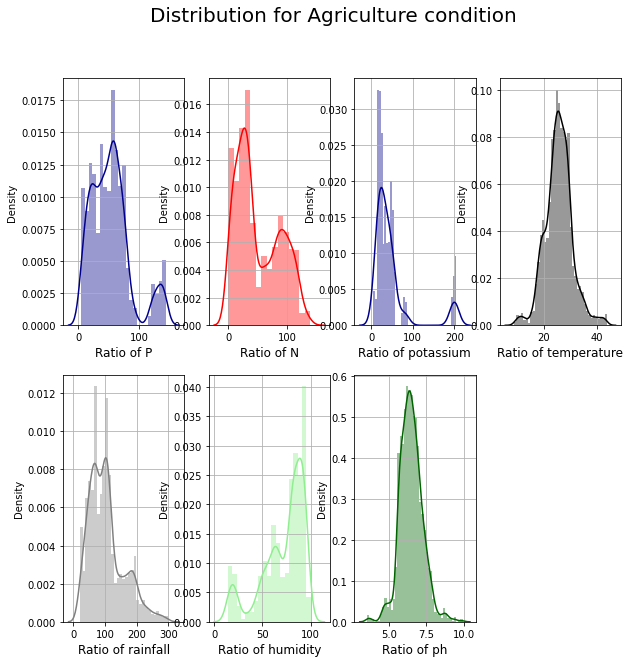

In [ ]:
plt.subplot(2,4,1)
sns.distplot(df['P'],color='darkblue')
plt.xlabel('Ratio of P',fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['N'],color='red')
plt.xlabel('Ratio of N',fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['K'],color='darkblue')
plt.xlabel('Ratio of potassium',fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df[ 'temperature'],color='black')
plt.xlabel('Ratio of temperature',fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['rainfall'],color='gray')
plt.xlabel('Ratio of rainfall',fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['humidity'],color='lightgreen')
plt.xlabel('Ratio of humidity',fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['ph'],color='darkgreen')
plt.xlabel('Ratio of ph',fontsize=12)
plt.grid()

plt.suptitle("Distribution for Agriculture condition",fontsize=20)
plt.show()

In [ ]:
print(" patterns")
print("-------------------------")
print("crops which requires very High Ratio Nitrogen Content in soil:",df[df['N']>120]['label'].unique())
print("crops which requires very High Ratio phasphorous Content in soil:",df[df['P']>100]['label'].unique())
print("crops which requires very High Ratio potassium Content in soil:",df[df['K']>200]['label'].unique())
print("crops which requires very High Rainfall :",df[df['rainfall']>200]['label'].unique())
print("crops which requires very low temperature :",df[df['temperature']<10]['label'].unique())
print("crops which requires very HIgh temperature :",df[df['temperature']>40]['label'].unique())
print("crops which requires very low humidity :",df[df['humidity']<20]['label'].unique())
print("crops which requires very low ph :",df[df['ph']<4]['label'].unique())
print("crops which requires very low ph :",df[df['ph']>9]['label'].unique())

 patterns
-------------------------
crops which requires very High Ratio Nitrogen Content in soil: ['cotton']
crops which requires very High Ratio phasphorous Content in soil: ['grapes' 'apple']
crops which requires very High Ratio potassium Content in soil: ['grapes' 'apple']
crops which requires very High Rainfall : ['rice' 'papaya' 'coconut']
crops which requires very low temperature : ['grapes']
crops which requires very HIgh temperature : ['grapes' 'papaya']
crops which requires very low humidity : ['chickpea' 'kidneybeans']
crops which requires very low ph : ['mothbeans']
crops which requires very low ph : ['mothbeans']


In [ ]:
print("summer crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print('---------------------------')
print("Winter crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print('---------------------------')
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())

summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------
Winter crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
---------------------------
['rice' 'papaya' 'coconut']


In [ ]:
from sklearn.cluster import KMeans
x = df.drop(['label'],axis=1)

x = x.values

print(x.shape)
x[0]

(2200, 7)


array([ 90.        ,  42.        ,  43.        ,  20.87974371,
        82.00274423,   6.50298529, 202.9355362 ])

In [ ]:

kn = KMeans(n_clusters = 4,init = 'k-means++',max_iter = 300,n_init = 10, random_state = 0)
y_means = kn.fit_predict(x)

# lets find out the Result
a=df['label']
y_mean = pd.DataFrame(y_means)
z = pd.concat( [ y_mean,a ] , axis = 1)
z = z.rename(columns = {0:'cluster'})
# lets check clusters of each crops

print('lets check the Result After Applying the k Means Custering Analysis \n')
print('crops in first cluster:',z[z['cluster']==0]['label'].unique())
print('----------------------------------------------------------------------')
print('crops in first cluster:',z[z['cluster']==1]['label'].unique())
print('----------------------------------------------------------------------')
print('crops in first cluster:',z[z['cluster']==2]['label'].unique())
print('----------------------------------------------------------------------')
print('crops in first cluster:',z[z['cluster']==3]['label'].unique())
print('----------------------------------------------------------------------')


lets check the Result After Applying the k Means Custering Analysis 

crops in first cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
----------------------------------------------------------------------
crops in first cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
----------------------------------------------------------------------
crops in first cluster: ['grapes' 'apple']
----------------------------------------------------------------------
crops in first cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
----------------------------------------------------------------------


In [ ]:
y = df['label']
x = df.drop(['label'],axis = 1)

print('shape of x: ',x.shape)
print('shape of y: ',y.shape)

shape of x:  (2200, 7)
shape of y:  (2200,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

print('The shape of x_train', x_train.shape)
print('The shape of x_test', x_test.shape)
print('The shape of y_train', y_train.shape)
print('The shape of y_test', y_test.shape)

The shape of x_train (1760, 7)
The shape of x_test (440, 7)
The shape of y_train (1760,)
The shape of y_test (440,)


In [ ]:
acc = []
model = []

In [ ]:
import seaborn as sns
from sklearn import tree
model_Dt = tree.DecisionTreeClassifier(random_state=10, max_depth=100)
model_Dt.fit(x_train,y_train)
y_pred_Dt = model_Dt.predict(x_test)

In [ ]:
from sklearn import metrics
acc.append(metrics.accuracy_score(y_test, y_pred_Dt))
model.append('Decision Tree')
Decision_Tree_Accuracy = metrics.accuracy_score(y_test, y_pred_Dt)
Decision_Tree_Accuracy*100

99.0909090909091

In [ ]:
sum(y_pred_Dt == y_test)

436

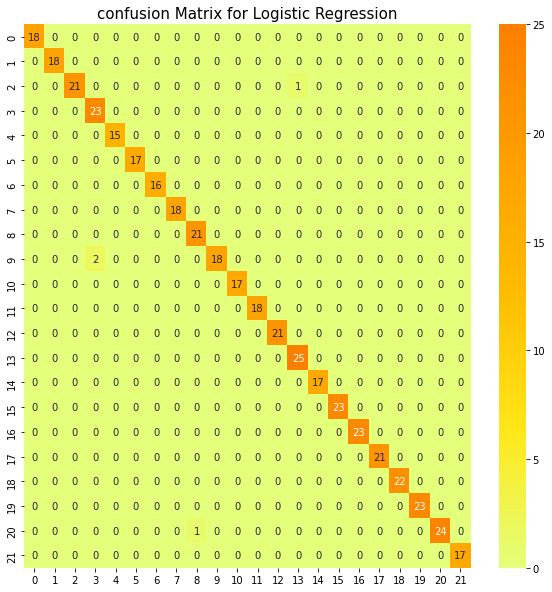

In [ ]:
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_Dt)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix for Logistic Regression',fontsize = 15)
plt.show()

In [ ]:
from sklearn.svm import SVC
model_svc = SVC(C=0.3,kernel='linear')
model_svc.fit(x_train,y_train)
y_pred_SVC = model_svc.predict(x_test)
# calculate accuracy
from sklearn import metrics
acc.append(metrics.accuracy_score(y_test, y_pred_SVC))
model.append('SVM')
SVM_Accuracy = metrics.accuracy_score(y_test, y_pred_SVC)
SVM_Accuracy*100

98.63636363636363

In [ ]:
sum(y_pred_SVC == y_test)

434

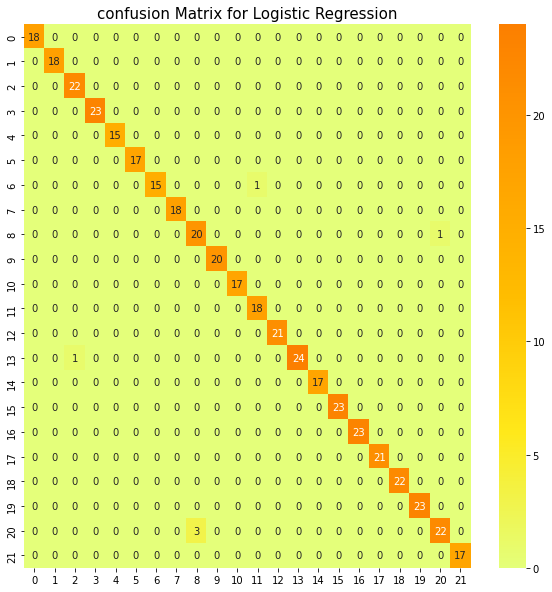

In [ ]:
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_SVC)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix for Logistic Regression',fontsize = 15)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LG = LogisticRegression(C=0.3)
model_LG.fit(x_train,y_train)
y_pred_LG = model_LG.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics
acc.append(metrics.accuracy_score(y_test, y_pred_LG))
model.append('LogisticRegression')
Logistic_Regression_Accuracy = metrics.accuracy_score(y_test, y_pred_LG)
Logistic_Regression_Accuracy*100

96.5909090909091

In [ ]:
sum(y_pred_LG == y_test)

425

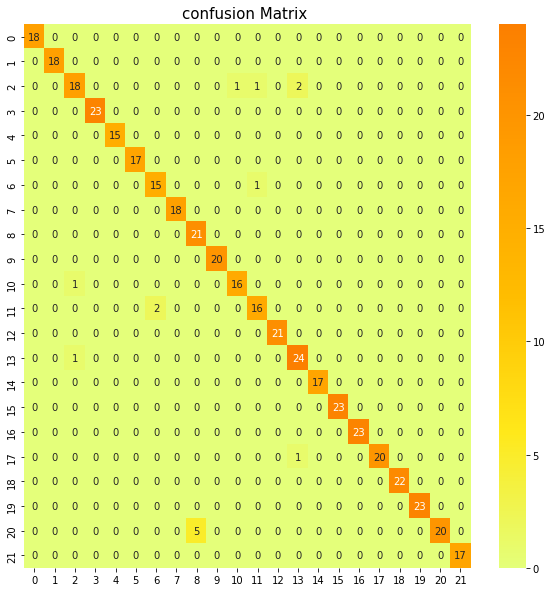

In [ ]:
from sklearn.metrics import confusion_matrix 
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_LG)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix ',fontsize = 15)
plt.show()

In [ ]:
prediction = model_LG.predict((np.array([[108,
                                       35,
                                       30,
                                       30,
                                       70,
                                       7,
                                       180]])))
print('the suggested crop for Given climate condition is :',prediction)

the suggested crop for Given climate condition is : ['coffee']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predictionn = model_svc.predict((np.array([[27,120,200,21.452787,90.745319,6.110219,116.703658]])))
print('the suggested crop by SVC for Given climate condition is :',predictionn)

the suggested crop by SVC for Given climate condition is : ['apple']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
pickle.dump(df.to_dict(),open('data_set.pkl','wb'))
pickle_ut = open("model_Dt.pkl","wb")
pickle.dump(model_Dt,pickle_ut)
pickle_ut.close()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier( max_depth=21, n_estimators=41)
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
acc.append(metrics.accuracy_score(y_test, y_pred_rf))
model.append('RandomForest')
Random_Forest_Accuracy = metrics.accuracy_score(y_test,y_pred_rf)
Random_Forest_Accuracy*100

99.77272727272727

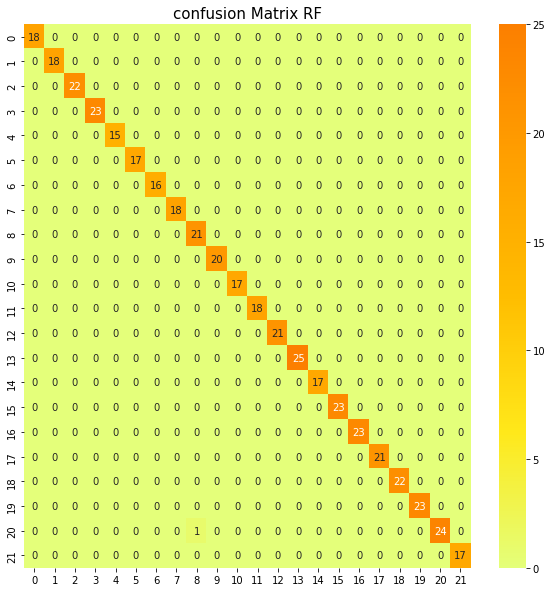

In [ ]:
sum(y_pred_rf == y_test)

plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix RF',fontsize = 15)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(leaf_size= 1,p= 15,n_neighbors= 5)
knn.fit(x_train, y_train)
KNN_Accuracy = knn.score(x_test, y_test)
KNN_Accuracy*100

98.18181818181819

In [ ]:
y_pred_knn = knn.predict(x_test)
acc.append(metrics.accuracy_score(y_test, y_pred_knn))
model.append('KNN')
sum(y_pred_knn == y_test)

432

In [ ]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514
...,...,...,...,...,...,...,...
446,32,70,20,20.893427,46.248565,6.208843,195.569787
1005,93,94,53,25.866324,84.423793,6.079179,114.535750
1919,117,56,15,25.992374,77.054355,7.368258,89.118821
708,27,64,21,32.842130,68.684015,7.543804,73.671662


In [ ]:
knn.predict([[105,14,50,26.214884,87.688398,6.419052,59.655908]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['watermelon'], dtype=object)

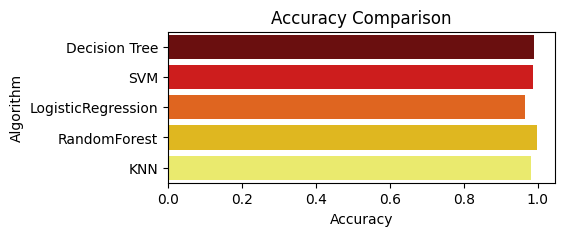

In [ ]:
plt.figure(figsize=[5,2],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='hot')

In [ ]:
model_rf.predict([[105,14,50,26.214884,87.688398,6.419052,59.655908]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['watermelon'], dtype=object)

In [ ]:
Model_Accuracy = [['Random Forest', Random_Forest_Accuracy], ['Decision Tree', Decision_Tree_Accuracy], ['SVM', SVM_Accuracy], ['KNN', KNN_Accuracy], ['Logistic Regression', Logistic_Regression_Accuracy]]
 
Accuracy = pd.DataFrame(Model_Accuracy, columns = ['MODEL', 'ACCURACY'])

Accuracy

,MODEL,ACCURACY
0,Random Forest,0.997727
1,Decision Tree,0.990909
2,SVM,0.986364
3,KNN,0.981818
4,Logistic Regression,0.965909
